# Ejercicio 3: Plot the monthly number of searches 

##       for flights arriving at Málaga, Madrid or Barcelona

# Team Science t-ish

## Importamos librerias

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [132]:
#Aeropuertos que queremos analizar: Madrid, Barcelona y Málaga
iata_codes = ["MAD", "BCN", "AGP"]

In [80]:
df_filter = pd.DataFrame()
chunksize = 999999 

reader =  pd.read_csv(
    'searches.csv.bz2', 
    compression = "bz2", 
    sep = "^", 
    memory_map = True, 
    error_bad_lines = False,
    usecols=["Date","Destination"],
    chunksize=chunksize
)

In [81]:
%%time
for df in reader:      
    curr = df[df["Destination"].isin(iata_codes)]
    if df_filter.empty:
        df_filter = curr
    else:
        df_filter = pd.concat([df_filter, curr])

In [82]:
df_filter.head(2)

,Date,Destination
4,2013-01-01,MAD
93,2013-01-01,AGP


In [84]:
df_filter.shape

(676382, 2)

In [90]:
df_filter['Date']=pd.to_datetime(df_filter['Date'])
df_filter['Mes']=df_filter['Date'].dt.month

In [93]:
#Agrupo por destino y mes
df_agrupado = df_filter.groupby(by=["Destination", "Mes"]).count()

In [94]:
df_agrupado

Date
Destination Mes       
AGP         1     9633
            2     8379
            3    10659
            4     8265
            5    10830
            6     7923
            7     8892
            8     7866
            9     8151
            10    6499
            11    6384
            12    3696
BCN         1    29469
            2    28329
            3    30552
            4    31236
            5    28728
            6    26505
            7    29241
            8    27075
            9    23427
            10   20276
            11   19824
            12   15400
MAD         1    24258
            2    22800
            3    24681
            4    25251
            5    26334
            6    22800
            7    22971
            8    21831
            9    21147
            10   22294
            11   20272
            12   14504

In [101]:
df_agrupado_1 = df_agrupado.reset_index()  #Paso los Indices a Columnas
df_agrupado_1.head(2)

,Destination,Mes,Date
0,AGP,1,9633
1,AGP,2,8379


In [105]:
#Renombramos el título del campo que arrastamos de "Date" a "Cuenta"
df_agrupado_1 = df_agrupado_1.rename(columns={'Date': 'Cuenta'})
df_agrupado_1.head()

,Destination,Mes,Cuenta
0,AGP,1,9633
1,AGP,2,8379
2,AGP,3,10659
3,AGP,4,8265
4,AGP,5,10830


<AxesSubplot:xlabel='Mes', ylabel='Cuenta'>

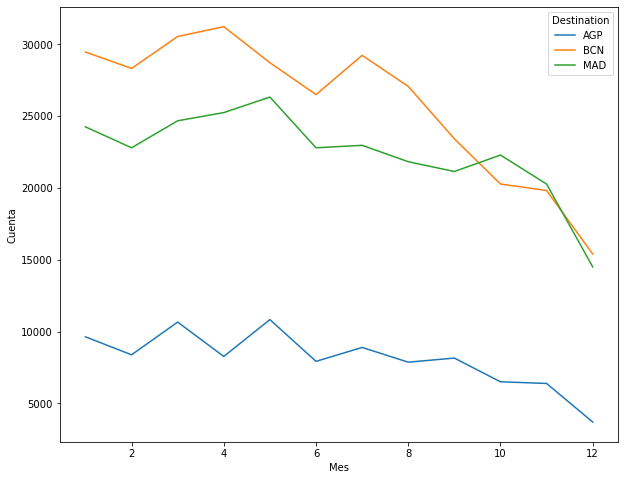

In [116]:
fig, ax = plt.subplots(figsize=(10,8))

#En eje X saco con .index todos los posibles valores de "Mes"
eje_x=df_agrupado_1['Mes'].value_counts().index

#En eje Y represento la cuenta total para cada mes y para cada Aeroupuerto

sns.lineplot(data=df_agrupado_1, x="Mes", y="Cuenta", hue="Destination", ax=ax)

In [124]:
d={'Meses': ['Enero','Febrero','Marzo','Abril','Mayo','Junio','Julio',
             'Agosto','Septiembre','Octubre','Noviembre','Diciembre'],
  'Mes': [1,2,3,4,5,6,7,8,9,10,11,12]}
df_meses=pd.DataFrame(data=d)
df_meses

,Meses,Mes
0,Enero,1
1,Febrero,2
2,Marzo,3
3,Abril,4
4,Mayo,5
5,Junio,6
6,Julio,7
7,Agosto,8
8,Septiembre,9
9,Octubre,10


In [125]:
#Hacemos un Merge entre la tabla de meses y la de agrupaciones
df_agrupado_1 = pd.merge(df_agrupado_1, df_meses, on="Mes", how='left')

In [126]:
df_agrupado_1

,Destination,Mes,Cuenta,Meses
0,AGP,1,9633,Enero
1,AGP,2,8379,Febrero
2,AGP,3,10659,Marzo
3,AGP,4,8265,Abril
4,AGP,5,10830,Mayo
5,AGP,6,7923,Junio
6,AGP,7,8892,Julio
7,AGP,8,7866,Agosto
8,AGP,9,8151,Septiembre
9,AGP,10,6499,Octubre


## Rehacemos gráfica cambiando el eje x por los nombres de meses 

<AxesSubplot:xlabel='Meses', ylabel='Cuenta'>

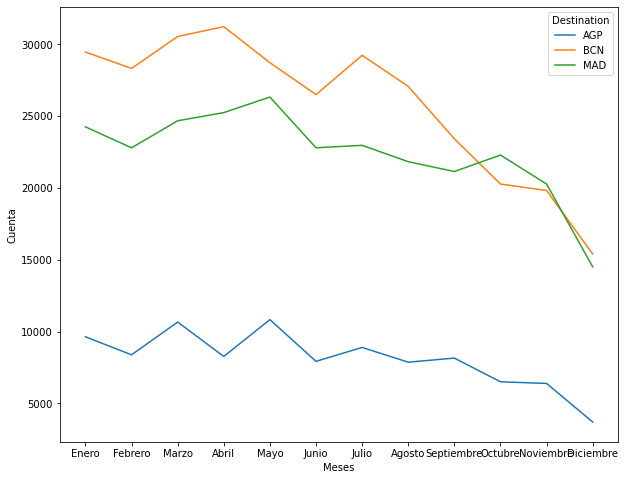

In [131]:
fig, ax = plt.subplots(figsize=(10,8))

#En eje X saco con .index todos los posibles valores de "Mes"
eje_x=df_agrupado_1['Mes'].value_counts().index

#En eje Y represento la cuenta total para cada mes y para cada Aeroupuerto

sns.lineplot(data=df_agrupado_1, x="Meses", y="Cuenta", hue="Destination", ax=ax)